In [1]:
import numpy
import bovy_mcmc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Inference of the dispersion of a Gaussian with Gaussian data errors

Suppose we have data draw from a delta function with Gaussian uncertainties (all equal). How well do we limit the dispersion? Sample data:

In [2]:
ndata= 24
data= numpy.random.normal(size=ndata)

We assume that the mean is zero and implement the likelihood

In [3]:
def loglike(sigma,data):
    if sigma <= 0. or sigma > 2.: return -1000000000000000.
    return -numpy.sum(0.5*numpy.log(1.+sigma**2.)+0.5*data**2./(1.+sigma**2.))

Now sample with slice sampling

In [4]:
nsamples= 10000
samples= bovy_mcmc.slice(numpy.array([1.]),1.,loglike,(data,),
                        isDomainFinite=[True,True],domain=[0.,2.],
                        nsamples=nsamples)

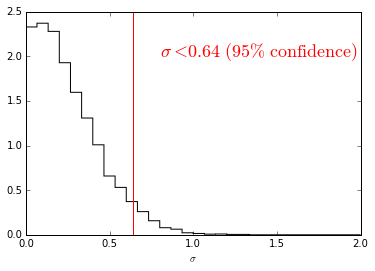

In [5]:
hist(numpy.array(samples),
     range=[0.,2.],bins=0.3*numpy.sqrt(nsamples),
     histtype='step',color='k',normed=True)
x95= sorted(samples)[int(numpy.floor(0.95*nsamples))]
plot([x95,x95],ylim(),'r-')
text(0.4,0.8,r'$\sigma < %.2f\ (95\%%\ \mathrm{confidence})$' % x95,
     transform=gca().transAxes,size=18.,color='r',
     backgroundcolor='w')
xlabel(r'$\sigma$')

## Dependence on $N$

We write a function that returns the 95% upper limit as a function of sample size $N$

In [6]:
def uplimit(N,ntrials=30,nsamples=1000):
    out= []
    for ii in range(ntrials):
        data= numpy.random.normal(size=N)
        samples= bovy_mcmc.slice(numpy.array([1.]),1./N**0.25,loglike,(data,),
                            isDomainFinite=[True,True],domain=[0.,2.],
                            nsamples=nsamples)
        out.append(sorted(samples)[int(numpy.floor(0.95*nsamples))])
    return numpy.median(out)

In [7]:
N= 10.**numpy.linspace(1,5,21)
y= [uplimit(n) for n in N]

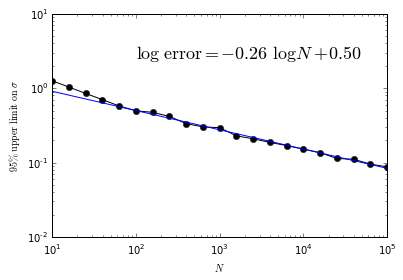

In [8]:
loglog(N,y,'ko-')
p= numpy.polyfit(numpy.log(N)[5:],numpy.log(y)[5:],deg=1)
loglog(N,numpy.exp(p[0]*numpy.log(N)+p[1]),'b-')
text(0.25,0.8,r'$\log\ \mathrm{error} = %.2f \,\log N + %.2f$' % (p[0],p[1]),
     transform=gca().transAxes,size=18.)
xlabel(r'$N$')
ylabel(r'$\mathrm{95\%\ upper\ limit\ on}\ \sigma$')

So the limit appears to go as $\propto N^{-1/4}$. We can understand this as follows: the likelihood for $\sigma$ is

$\mathcal{L}(\sigma) \propto (1+\sigma^2)^{-N/2} \exp\left(-\frac{1}{2}\,\frac{\sum_i d_i^2}{1+\sigma^2}\right)\,$

for $N$ data points $d_i$. This is a $\chi^2$ distribution for $\frac{\sum_i d_i^2}{1+\sigma^2}$ with $N+2$ degrees of freedom. For large $N$, this approaches a Gaussian, i.e., 

$\left(\frac{\sum_i d_i^2}{1+\sigma^2}-N-2\right)\Big/\sqrt{2(N+2)} \sim \mathcal{N}(0,1)$

An lower limit on this is a constant $-C$, so

$\left(\frac{\sum_i d_i^2}{1+\sigma^2}-N-2\right)\Big/\sqrt{2(N+2)} = -C$

For large $N$, $\sum_i d_i^2$ will be approximately $N$ and we can write

$\frac{N}{1+\sigma^2}-N-2 \propto -N^{1/2}$

$\sigma^2$ will be small and we can write

$N(1-\sigma^2)-N-2 \propto -N^{1/2}$

so

$\sigma \propto N^{-1/4}$. 

If the data have uncertainties $\delta$, then it is easy to show that this becomes

$\sigma \propto \delta \, N^{-1/4}$. 

If we are in a situation where the individual uncertainties are limit by photon noise, then $\delta$ depends on the time $T$ spent observing as $\delta \propto T^{-1/2}$ and the number of objects goes as $N \propto T$; therefore, the limit on $\sigma$ depends on $T$ as

$\sigma \propto \delta \, N^{-1/4} \propto T^{-1/2}\, T^{-1/4}$. 

Therefore, it is a better investment of observing time $T$ to obtain better observations for individual objects than to observe more objects.